# Data Analysis and Prediction of Data for FAFSA completion for graduating seniors.
<b>Background:</b>The state of IL passed a bill requiring HS students to complete the FAFSA application in order to obtain their graduation diploma. We have been tracking the FAFSA completion for current seniors. The data set contains demographic information and academic information.
<p><b>Objective:</b>Find the feature(s) that predict those that would complete FAFSA, yet, in a practical sense, we need to act upon the group that does not complete FAFSA to promote it or provide more support among the students and the parents. In this sence we would be interested in the “did not complete FAFSA” as the class of highest interest. </p>

In [263]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings 
warnings.filterwarnings("ignore")

In [264]:
#####load files into variables
train = pd.read_csv("RTI.csv")
test = pd.read_csv("RTI copy.csv")

In [265]:
train_original = train.copy()
test_original = test.copy()

In [266]:
print (train.columns) 
print (test.columns)

Index(['gender', 'IEP', 'Section 504', 'EL Status', 'Race Ethnicity',
       'Fee Waiver', 'GPA Groups', 'cumGPAw', 'AP Course',
       'RTI Intervention Note', 'ParentEdLevel', 'DFs', 'ADA', 'MissAssign',
       'G12 FAFSA Requirement', 'MTSS Tier ReferenceQ'],
      dtype='object')
Index(['gender', 'IEP', 'Section 504', 'EL Status', 'Race Ethnicity',
       'Fee Waiver', 'GPA Groups', 'cumGPAw', 'AP Course',
       'RTI Intervention Note', 'ParentEdLevel', 'DFs', 'ADA', 'MissAssign',
       'G12 FAFSA Requirement', 'MTSS Tier ReferenceQ'],
      dtype='object')


In [267]:
print (train.dtypes)

gender                    object
IEP                       object
Section 504               object
EL Status                 object
Race Ethnicity            object
Fee Waiver                object
GPA Groups                object
cumGPAw                  float64
AP Course                 object
RTI Intervention Note     object
ParentEdLevel             object
DFs                       object
ADA                       object
MissAssign                object
G12 FAFSA Requirement     object
MTSS Tier ReferenceQ     float64
dtype: object


In [268]:
print(train.shape, test.shape)

(3093, 16) (3093, 16)


In [269]:
train.head()

,gender,IEP,Section 504,EL Status,Race Ethnicity,Fee Waiver,GPA Groups,cumGPAw,AP Course,RTI Intervention Note,ParentEdLevel,DFs,ADA,MissAssign,G12 FAFSA Requirement,MTSS Tier ReferenceQ
0,Female,IEP-N,504-N,EL-N,White,N,3.5-3.99,3.59,AP Course Ever- N,RTI Note-None,4 Year College Degree or More,0,100.00%,,Waiver,1.0
1,Female,IEP-N,504-Y,EL-N,White,N,3.5-3.99,3.98,AP Course Ever- Y,RTI Note-None,4 Year College Degree or More,0,98.30%,4,FAFSA Complete,1.0
2,Male,IEP-Y,504-N,EL-Y,Race 2+,N,2.2.79,2.61,AP Course Ever- N,RTI Note-Current Year,4 Year College Degree or More,3,100.00%,3,FAFSA Complete,2.0
3,Female,IEP-N,504-N,EL-N,White,N,3.5-3.99,3.58,AP Course Ever- Y,RTI Note-Current Year,4 Year College Degree or More,1,96.70%,1,FAFSA Complete,1.0
4,Male,IEP-N,504-N,EL-N,White,N,3-3.49,3.14,AP Course Ever- Y,RTI Note-Current Year,4 Year College Degree or More,2,96.70%,3,FAFSA Complete,2.0


In [270]:
train['EL Status'].unique()

array(['EL-N', 'EL-Y', 'EL-MY3', 'EL-MY2', 'EL-MY1', 'EL-MY4'],
      dtype=object)

In [271]:
train['EL Status']=np.where(train['EL Status'] =='EL-MY1', 'EL-Y', train['EL Status'])
train['EL Status']=np.where(train['EL Status'] =='EL-MY2', 'EL-Y', train['EL Status'])
train['EL Status']=np.where(train['EL Status'] =='EL-MY3', 'EL-Y', train['EL Status'])
train['EL Status']=np.where(train['EL Status'] =='EL-MY4', 'EL-Y', train['EL Status'])

In [272]:
train['EL Status'].unique()

array(['EL-N', 'EL-Y'], dtype=object)

In [273]:
train['G12 FAFSA Requirement'].value_counts()
#This is the target value

FAFSA Complete        1865
G12 NONE              1156
Waiver                  67
FAFSA Comp/ Waiver       5
Name: G12 FAFSA Requirement, dtype: int64

The column has values that are used for tracking the status of the application, some students can waive the completion of FAFSA, 
we'll treat this as No-Did not complete FAFSA(0). Some completed FAFSA and a waiver(rare) but FAFSA takes priority so, this values will be
considered as Yes-completed FAFSA(1), 1, means Yes, 0 means No

In [274]:
train['G12 FAFSA Requirement']=np.where(train['G12 FAFSA Requirement'] =='Waiver', 0, train['G12 FAFSA Requirement'])
train['G12 FAFSA Requirement']=np.where(train['G12 FAFSA Requirement'] =='G12 NONE', 0, train['G12 FAFSA Requirement'])
train['G12 FAFSA Requirement']=np.where(train['G12 FAFSA Requirement'] =='FAFSA Comp/ Waiver', 1, train['G12 FAFSA Requirement'])
train['G12 FAFSA Requirement']=np.where(train['G12 FAFSA Requirement'] =='FAFSA Complete', 1, train['G12 FAFSA Requirement'])

In [275]:
print (train.dtypes)
train['G12 FAFSA Requirement'].value_counts()

gender                    object
IEP                       object
Section 504               object
EL Status                 object
Race Ethnicity            object
Fee Waiver                object
GPA Groups                object
cumGPAw                  float64
AP Course                 object
RTI Intervention Note     object
ParentEdLevel             object
DFs                       object
ADA                       object
MissAssign                object
G12 FAFSA Requirement     object
MTSS Tier ReferenceQ     float64
dtype: object


1    1870
0    1223
Name: G12 FAFSA Requirement, dtype: int64

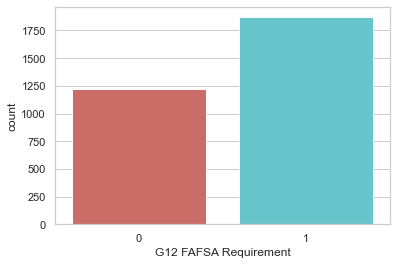

In [276]:
sns.countplot(x='G12 FAFSA Requirement',data=train, palette='hls')
plt.show()

In [277]:
count_no_sub = len(train[train['G12 FAFSA Requirement']==0])
count_sub = len(train[train['G12 FAFSA Requirement']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of students without a FAFSA application", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of students with a FAFSA application", pct_of_sub*100)

percentage of students without a FAFSA application 39.5408988037504
percentage of students with a FAFSA application 60.4591011962496


In [278]:
train.groupby('G12 FAFSA Requirement').mean()

,cumGPAw,MTSS Tier ReferenceQ
G12 FAFSA Requirement,,
0,2.740796,1.822357
1,3.573337,1.344602


In [279]:
train.groupby('cumGPAw').mean()

,MTSS Tier ReferenceQ
cumGPAw,
0.03,3.0
0.56,1.0
0.68,1.0
0.72,3.0
0.76,1.0
...,...
4.69,1.0
4.70,1.5
4.72,1.0


Text(0, 0.5, 'FAFSA completion')

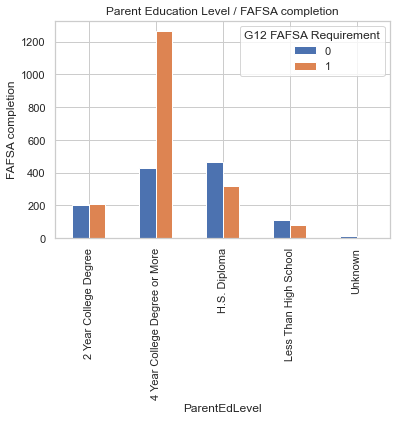

In [280]:
%matplotlib inline
pd.crosstab(train.ParentEdLevel,train['G12 FAFSA Requirement']).plot(kind='bar')
plt.title('Parent Education Level / FAFSA completion')
plt.xlabel('ParentEdLevel')
plt.ylabel('FAFSA completion')

My hypotesis is that the parent education level will affect whether a student would complete FAFSA. We see that those with 4 or more years of college do have a high completion rate, versus those students were the parent has less than HS. This is a good predictor. I think race would also be a good predictor

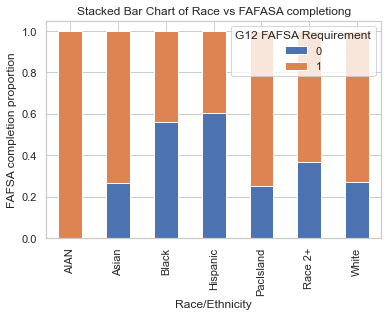

In [281]:
table=pd.crosstab(train['Race Ethnicity'],train['G12 FAFSA Requirement'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Race vs FAFASA completiong')
plt.xlabel('Race/Ethnicity')
plt.ylabel('FAFSA completion proportion')
plt.savefig('race_vs_fafsa_stack')

Race seems like another good predictor. Let's see if the waiver students(Free or Reduced meals(FRAM)) is a good predictor as well

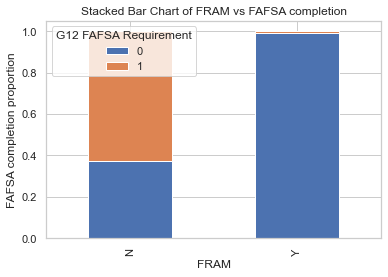

In [282]:
table=pd.crosstab(train['Fee Waiver'],train['G12 FAFSA Requirement'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of FRAM vs FAFSA completion')
plt.xlabel('FRAM')
plt.ylabel('FAFSA completion proportion')
plt.savefig('fram_vs_fafsa_stack')

Almost 100% of students in F/R meals have not completed the FAFSA application or will not be completing the application. 

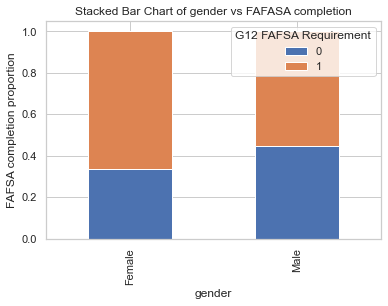

In [283]:
table=pd.crosstab(train.gender,train['G12 FAFSA Requirement'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of gender vs FAFASA completion')
plt.xlabel('gender')
plt.ylabel('FAFSA completion proportion')
plt.savefig('gender_vs_fafsa_stack')

Gender does not seem to have a strong impact with FAFSA completion, about the same amount of students- male and female- have completed the application.

Text(0, 0.5, 'Quantity')

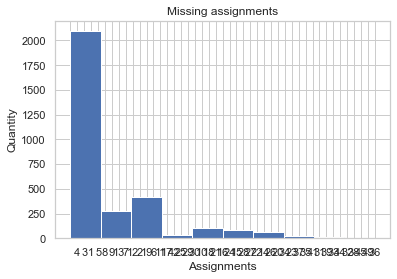

In [284]:
train.MissAssign.hist()
plt.title('Missing assignments')
plt.xlabel('Assignments')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

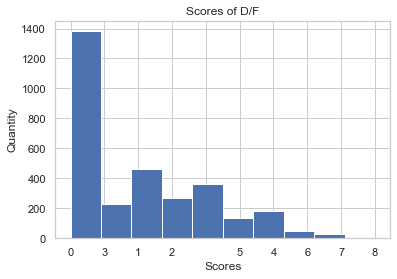

In [285]:
train.DFs.hist()
plt.title('Scores of D/F')
plt.xlabel('Scores')
plt.ylabel('Quantity')

The majority of the students don't have scores of D or Fs. We see a left skewed graph. Which is good. 

In [286]:
train['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [287]:
cat_vars=['gender', 'IEP', 'Section 504', 'EL Status', 'Race Ethnicity', 'Fee Waiver', 'GPA Groups', 'cumGPAw', 'AP Course',
       'RTI Intervention Note', 'ParentEdLevel', 'DFs', 'ADA', 'MissAssign', 'MTSS Tier ReferenceQ']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(train[var], prefix=var)
    train1=train.join(cat_list)
    train=train1
    
cat_vars=['gender', 'IEP', 'Section 504', 'EL Status', 'Race Ethnicity', 'Fee Waiver', 'GPA Groups', 'cumGPAw', 'AP Course',
       'RTI Intervention Note', 'ParentEdLevel', 'DFs', 'ADA', 'MissAssign', 'MTSS Tier ReferenceQ']
data_vars=train.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [288]:
data_final=train[to_keep]
data_final.columns.values

array(['G12 FAFSA Requirement', 'gender_Female', 'gender_Male',
       'IEP_IEP-N', 'IEP_IEP-Y', 'Section 504_504-N', 'Section 504_504-Y',
       'EL Status_EL-N', 'EL Status_EL-Y', 'Race Ethnicity_AIAN',
       'Race Ethnicity_Asian', 'Race Ethnicity_Black',
       'Race Ethnicity_Hispanic', 'Race Ethnicity_PacIsland',
       'Race Ethnicity_Race 2+', 'Race Ethnicity_White', 'Fee Waiver_N',
       'Fee Waiver_Y', 'GPA Groups_0-.99', 'GPA Groups_1-1.99',
       'GPA Groups_2.2.79', 'GPA Groups_2.8-2.99', 'GPA Groups_3-3.49',
       'GPA Groups_3.5-3.99', 'GPA Groups_4+', 'cumGPAw_0.03',
       'cumGPAw_0.56', 'cumGPAw_0.68', 'cumGPAw_0.72', 'cumGPAw_0.76',
       'cumGPAw_0.81', 'cumGPAw_0.85', 'cumGPAw_0.88', 'cumGPAw_0.95',
       'cumGPAw_0.98', 'cumGPAw_1.0', 'cumGPAw_1.03', 'cumGPAw_1.06',
       'cumGPAw_1.09', 'cumGPAw_1.1', 'cumGPAw_1.15', 'cumGPAw_1.16',
       'cumGPAw_1.17', 'cumGPAw_1.18', 'cumGPAw_1.19', 'cumGPAw_1.2',
       'cumGPAw_1.22', 'cumGPAw_1.23', 'cumGPAw_1.24',

In [289]:
X = data_final.loc[:, data_final.columns != 'G12 FAFSA Requirement' ]
y = data_final.loc[:, data_final.columns == 'G12 FAFSA Requirement' ]


In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
print(X_train)
print (X_test)

      gender_Female  gender_Male  IEP_IEP-N  IEP_IEP-Y  Section 504_504-N  \
1817              1            0          0          1                  1   
1939              1            0          1          0                  1   
1061              0            1          1          0                  0   
528               1            0          1          0                  1   
232               1            0          1          0                  1   
...             ...          ...        ...        ...                ...   
763               0            1          1          0                  1   
835               0            1          1          0                  1   
1653              0            1          1          0                  1   
2607              1            0          1          0                  1   
2732              0            1          0          1                  1   

      Section 504_504-Y  EL Status_EL-N  EL Status_EL-Y  Race Ethnicity_AIA

Ran into errors on the block below, so I installed imblearn
</br>pip3 install imblearn
pip install scikit-learn==0.23.1
pip install imbalanced-learn==0.7.0
pip install --upgrade scikit-learn

In [291]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['G12 FAFSA Requirement'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of FAFSA incompletion in oversampled data ",len(os_data_y[os_data_y['G12 FAFSA Requirement']==0]))
print("Number of FAFSA completion ",len(os_data_y[os_data_y['G12 FAFSA Requirement']==1]))
print("Proportion of FAFSA incompletion data in oversampled data is ",len(os_data_y[os_data_y['G12 FAFSA Requirement']==0])/len(os_data_X))
print("Proportion of FAFSA completion data in oversampled data is ",len(os_data_y[os_data_y['G12 FAFSA Requirement']==1])/len(os_data_X))

ValueError: Unknown label type: 'unknown'

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['G12 FAFSA Requirement']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

In [ ]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

### Logistic Regression Model Fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
##Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
##Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
#Compute precision, recall, F-measure and support

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


In [ ]:
##ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()